In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('dataset_square_11_filtered.csv')

In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df3 = df.iloc[0:16,0:4]

In [ ]:
df3

In [ ]:
arr1 = [0]*16; arr2 = [0]*16; arr3 = [0]*16; arr4 = [0]*16; arr5 = [0]*16; arr6 = [0]*16; arr7 = [0]*16; arr8 = [0]*16; arr9 = [0]*16; arr10 = [0]*16

for i in range (int(len(df)/16)):
  for j in range(16):
    arr1[j] += df['freq1'][i*16+j]
    arr2[j] += df['freq2'][i*16+j]
    arr3[j] += df['freq3'][i*16+j]
    arr4[j] += df['freq4'][i*16+j]
    arr5[j] += df['freq5'][i*16+j]
    arr6[j] += df['freq6'][i*16+j]
    arr7[j] += df['freq7'][i*16+j]
    arr8[j] += df['freq8'][i*16+j]
    arr9[j] += df['freq9'][i*16+j]
    arr10[j] += df['freq10'][i*16+j]

from statistics import mean
p_edges = []*16
temp = [0]*int(len(df)/16)
for j in range(16):
  for i in range(int(len(df)/16)): 
    temp[i] = df['pedge'][i*16+j]
  p_edges.append(mean(temp))

state = []
for i in range(len(df3)):
  state.append(str(df3['A'][i])+str(df3['B'][i])+str(df3['C'][i])+str(df3['D'][i]))

df3['string'] = state
df3['freq1_combined'] = arr1; df3['freq2_combined'] = arr2; df3['freq3_combined'] = arr3; df3['freq4_combined'] = arr4; df3['freq5_combined'] = arr5; df3['freq6_combined'] = arr6; df3['freq7_combined'] = arr7; df3['freq8_combined'] = arr8; df3['freq9_combined'] = arr9; df3['freq10_combined'] = arr10
df3['pedge'] = p_edges

freq_total = []
for i in range(16):
  freq_total.append(df3['freq1_combined'][i]+df3['freq2_combined'][i]+df3['freq3_combined'][i]+df3['freq4_combined'][i]+df3['freq5_combined'][i]+df3['freq6_combined'][i]+df3['freq7_combined'][i]+df3['freq8_combined'][i]+df3['freq9_combined'][i]+df3['freq10_combined'][i])

df3['freq_total'] = freq_total


In [ ]:
df3

,A,B,C,D,string,freq1_combined,freq2_combined,freq3_combined,freq4_combined,freq5_combined,freq6_combined,freq7_combined,freq8_combined,freq9_combined,freq10_combined,pedge,freq_total
0,1,1,1,1,1111,295,454,157,14,0,10,19,5,4,272,4,1230
1,0,1,1,1,0111,959,2117,719,62,15,5,9,21,27,693,2,4627
2,1,0,1,1,1011,3004,7899,1214,73,24,16,17,44,29,777,1,13097
3,1,1,0,1,1101,1333,2901,1017,86,13,35,27,30,20,753,1,6215
4,1,1,1,0,1110,573,1216,390,50,13,9,20,1,21,714,2,3007
5,1,1,0,0,1100,1209,2313,1155,174,32,18,29,16,27,735,1,5708
6,1,0,1,0,1010,5219,13865,3821,336,54,30,50,51,37,1309,1,24772
7,1,0,0,1,1001,8276,22055,6742,482,61,41,49,41,49,1085,1,38881
8,0,1,1,0,0110,7542,18393,4894,405,62,42,51,38,75,1365,1,32867
9,0,1,0,1,0101,6155,16863,4909,383,65,44,34,29,38,852,1,29372


In [ ]:
df

,A,B,C,D,freq1,freq2,freq3,freq4,freq5,freq6,...,freq8,freq9,freq10,AB,BC,CD,AD,AC,BD,pedge
0,1,1,1,1,42,31,18,4,0,0,...,4,4,112,1,1,1,1,1,1,6
1,0,1,1,1,122,228,62,23,6,1,...,16,25,287,1,1,1,1,1,1,3
2,1,0,1,1,127,221,90,15,3,3,...,13,12,285,1,1,1,1,1,1,3
3,1,1,0,1,132,204,79,22,11,10,...,18,4,308,1,1,1,1,1,1,3
4,1,1,1,0,152,222,74,22,7,2,...,0,10,341,1,1,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,1,0,0,0,13,93,82,4,1,0,...,0,0,0,1,0,0,0,1,1,1
172,0,1,0,0,26,103,65,5,1,0,...,0,0,0,1,0,0,0,1,1,1
173,0,0,1,0,3,2,6,1,0,0,...,0,0,0,1,0,0,0,1,1,2
174,0,0,0,1,3,2,3,2,1,0,...,0,0,0,1,0,0,0,1,1,2


In [ ]:
df.iloc[:,14]

0      1
1      1
2      1
3      1
4      1
      ..
651    0
652    0
653    0
654    0
655    0
Name: AB, Length: 656, dtype: int64

In [ ]:
freq_total_df = []
for i in range(len(df)):
  freq_total_df.append(df['freq1'][i]+df['freq2'][i]+df['freq3'][i]+df['freq4'][i]+df['freq5'][i]+df['freq6'][i]+df['freq7'][i]+df['freq8'][i]+df['freq9'][i]+df['freq10'][i])
df['freq_total_df'] = freq_total_df

In [ ]:
df

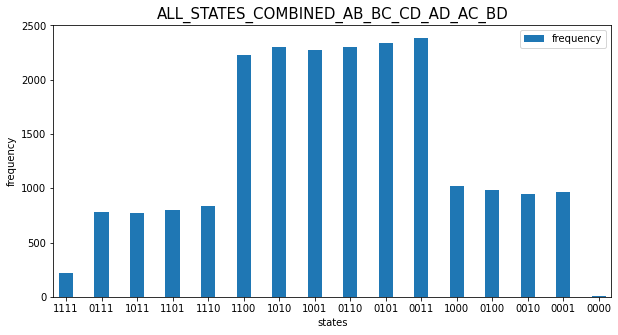

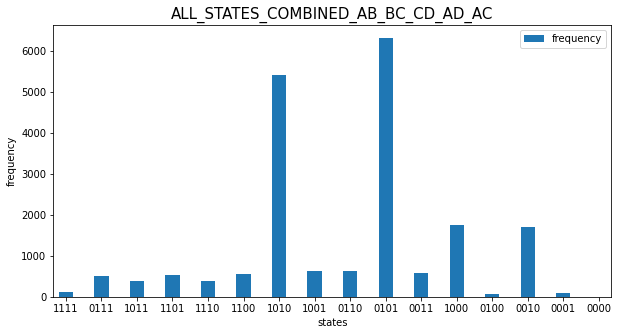

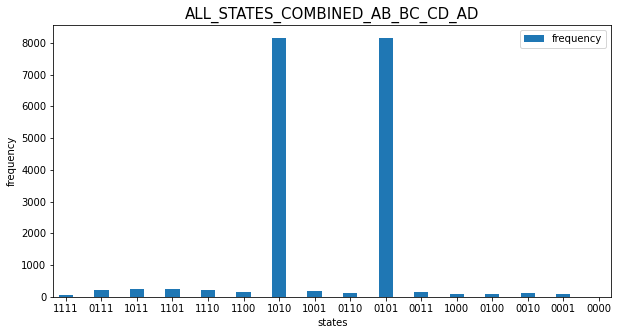

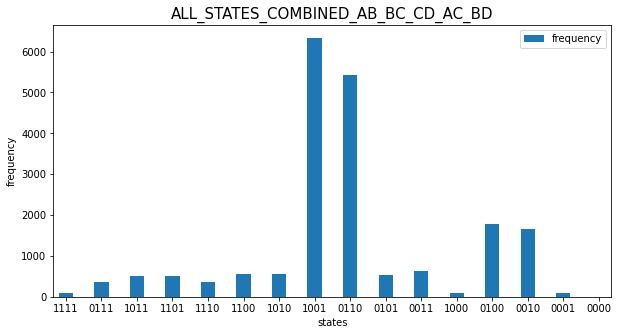

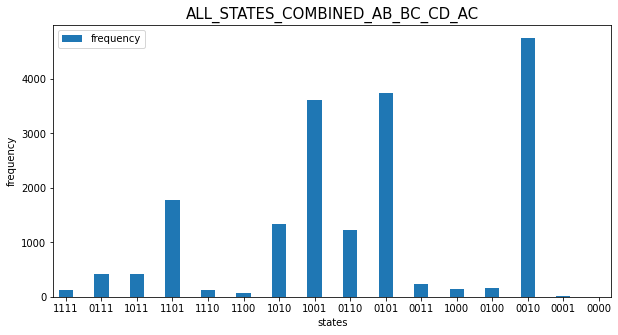

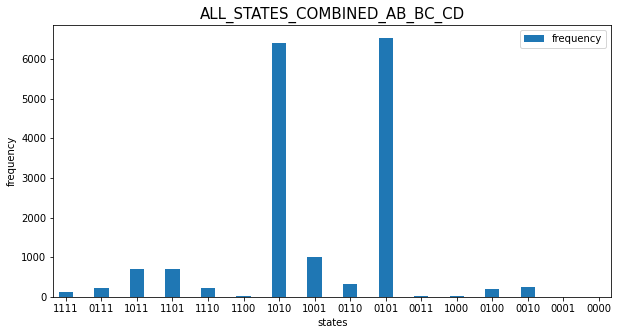

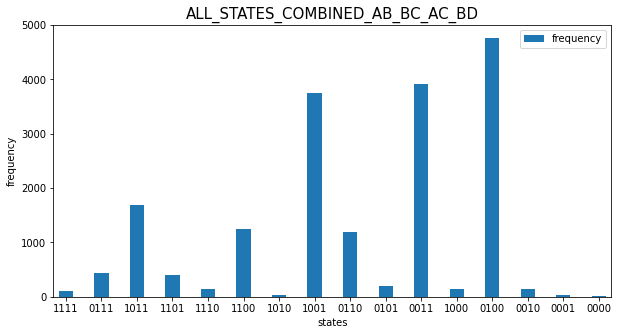

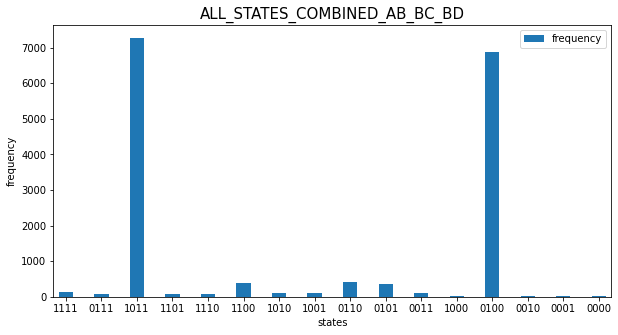

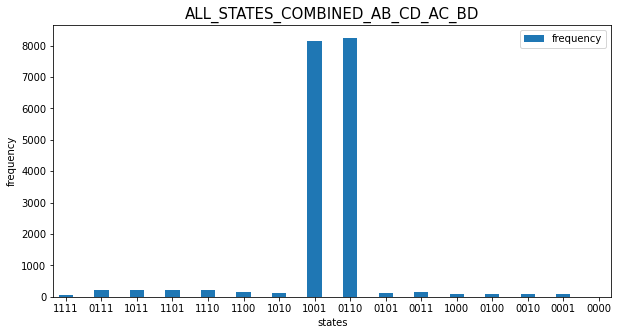

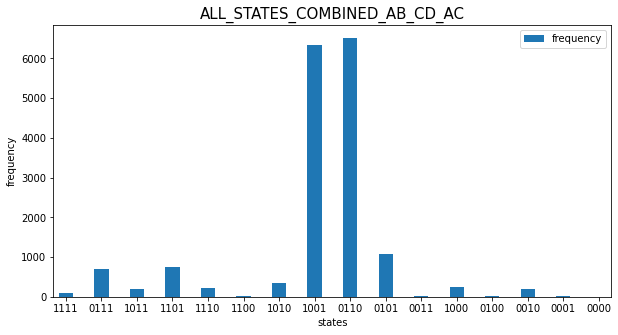

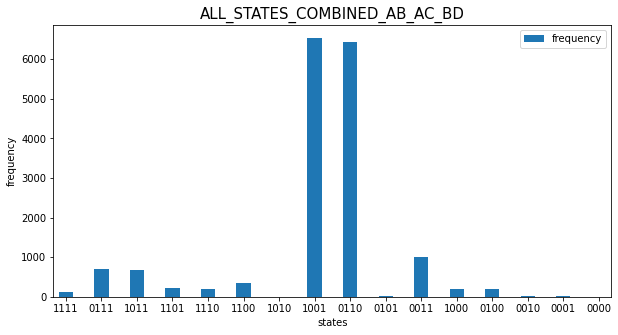

In [ ]:
for i in range (int(len(df)/16)):
  edges = ['']*6
  for j in range(6):
    if df.iloc[:,14+j][i*16] == 1: edges[j] = '_'+df.columns[14+j]
  plt.figure(figsize = (10,5))
  plt.ylabel('frequency')
  plt.xlabel('states')
  plt.title('ALL_STATES_COMBINED'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], fontdict = {'size':15})
  x_axis = np.arange(16)
  plt.bar(x_axis + 0.2,df['freq_total_df'][i*16+0:i*16+16], 0.4, label = 'frequency')
  # plt.bar(x_axis - 0.2,df['pedge'][i*62+0:i*62+62], 0.4, label = 'pedges')
  plt.xticks(x_axis + 0.2, df3['string'])
  plt.margins(0.01,0.05)
  plt.legend()
  plt.savefig('11_TPsq_all/ALL_STATES_COMBINED'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], bbox_inches = 'tight')
  plt.show()


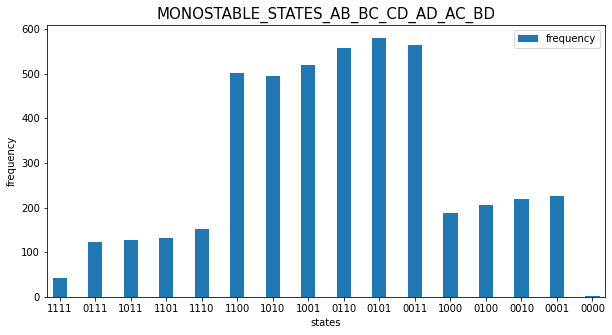

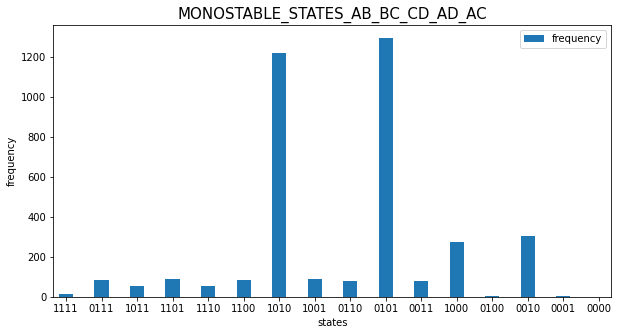

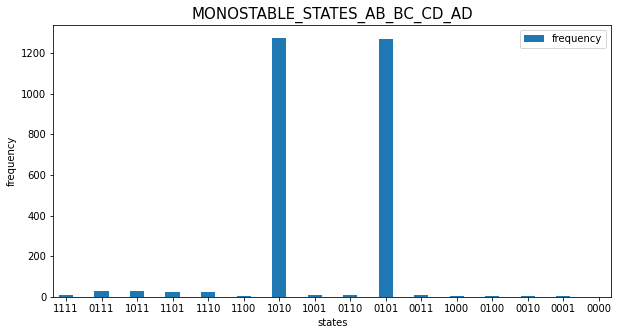

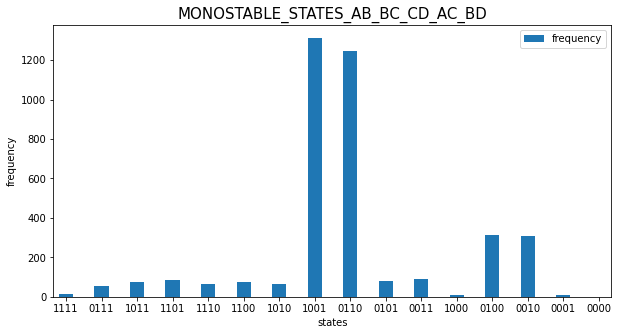

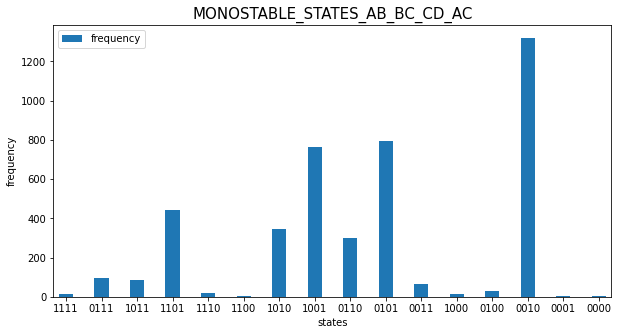

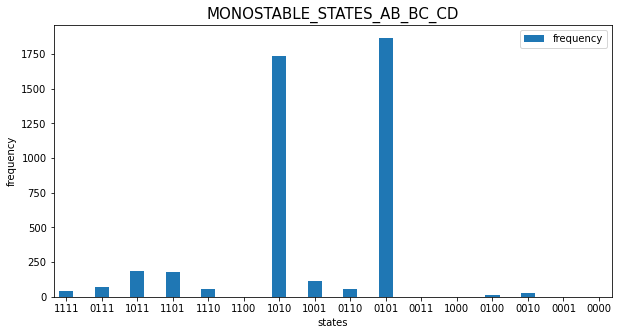

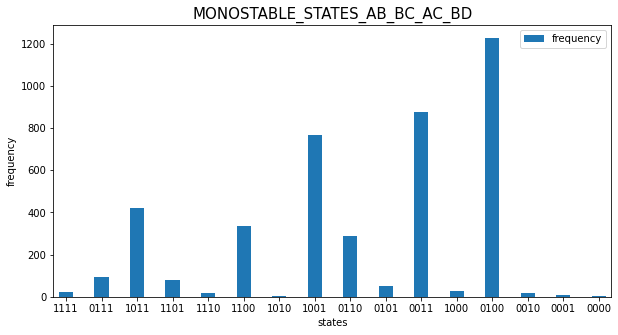

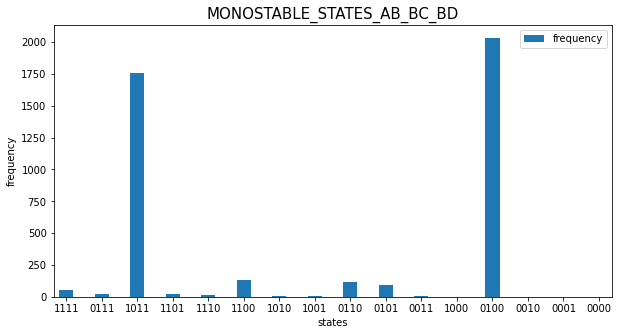

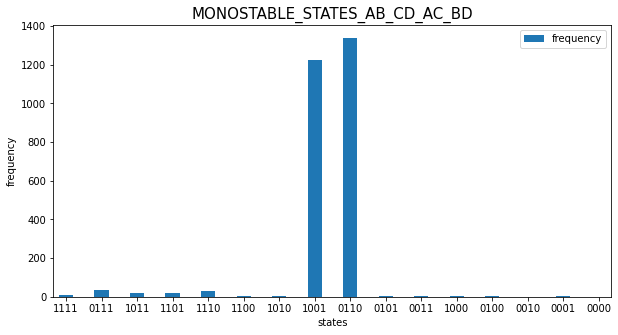

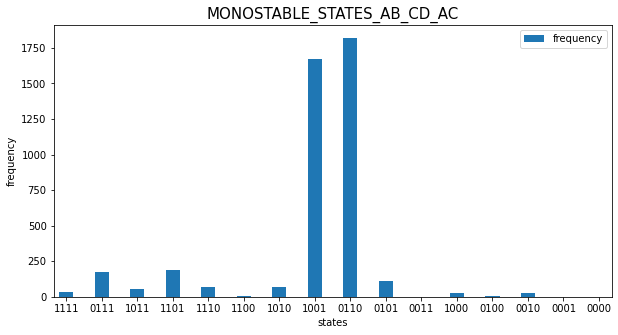

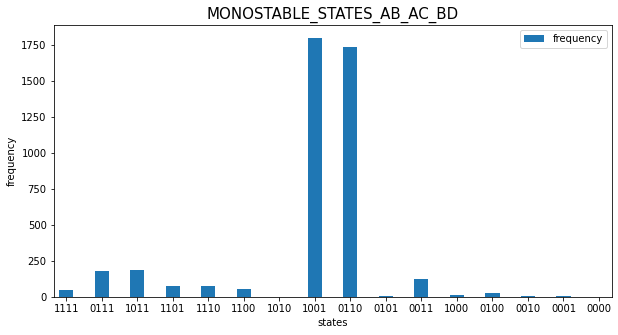

In [ ]:
for i in range (int(len(df)/16)):
  edges = ['']*6
  for j in range(6):
    if df.iloc[:,14+j][i*16] == 1: edges[j] = '_'+df.columns[14+j]
  plt.figure(figsize = (10,5))
  plt.ylabel('frequency')
  plt.xlabel('states')
  plt.title('MONOSTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], fontdict = {'size':15})
  x_axis = np.arange(16)
  plt.bar(x_axis + 0.2,df['freq1'][i*16+0:i*16+16], 0.4, label = 'frequency')
  # plt.bar(x_axis - 0.2,df['pedge'][i*62+0:i*62+62], 0.4, label = 'pedges')
  plt.xticks(x_axis + 0.2, df3['string'])
  plt.margins(0.01,0.05)
  plt.legend()
  plt.savefig('11_TPsq_monostable/MONOSTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], bbox_inches = 'tight')
  plt.show()


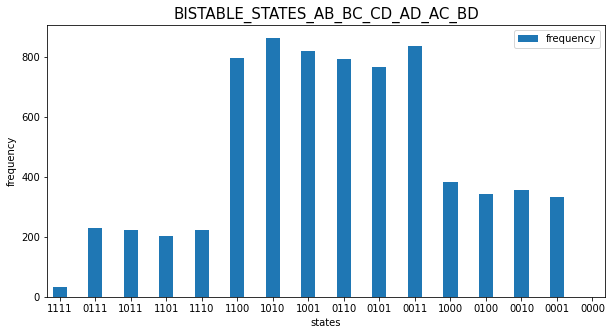

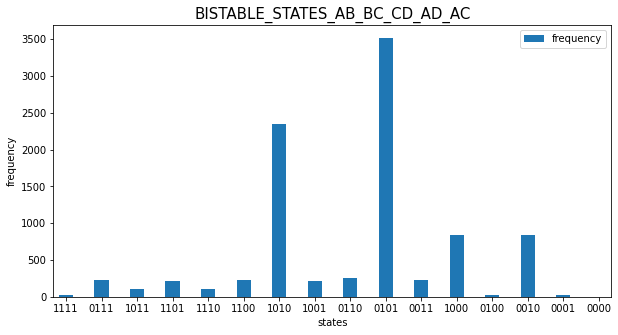

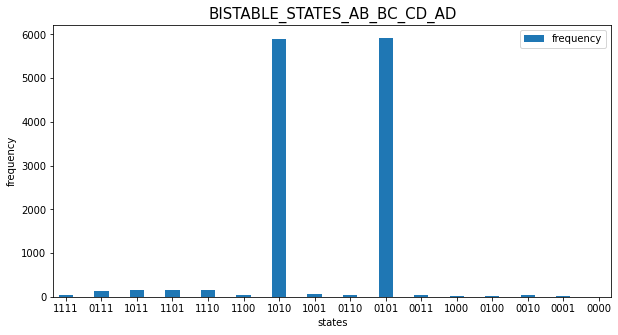

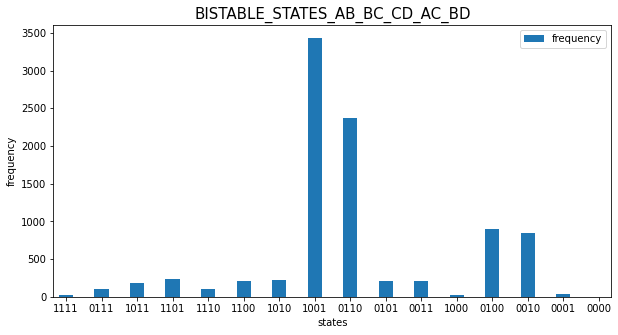

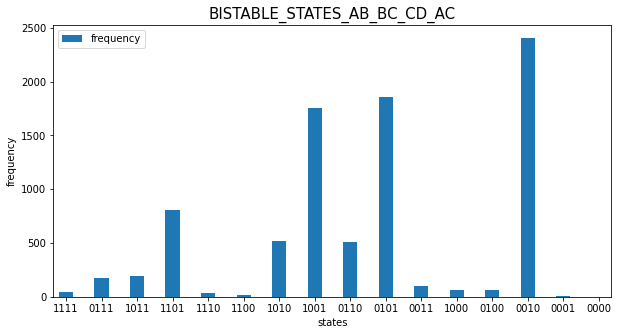

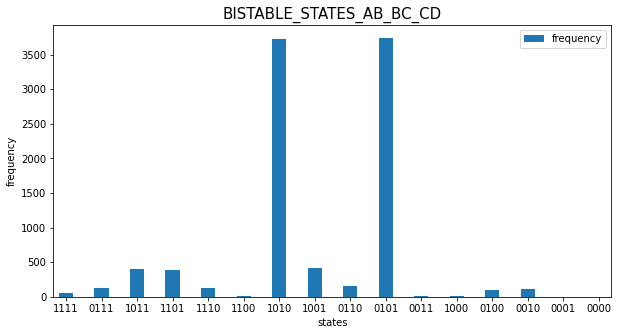

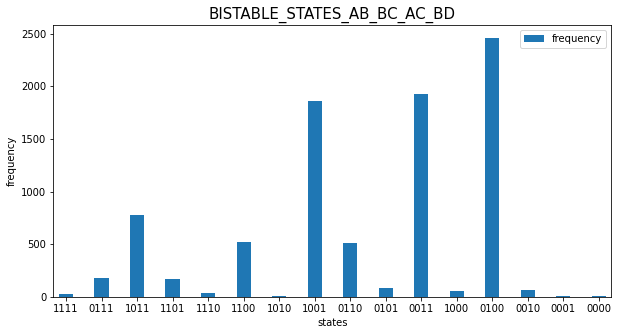

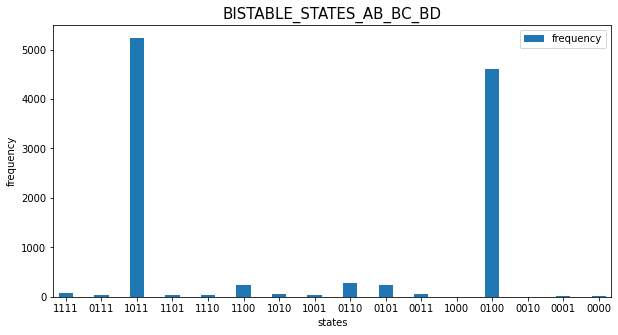

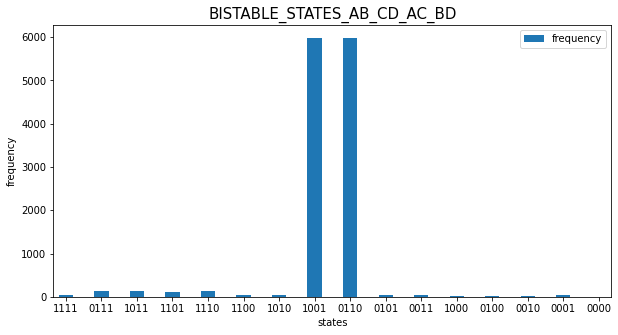

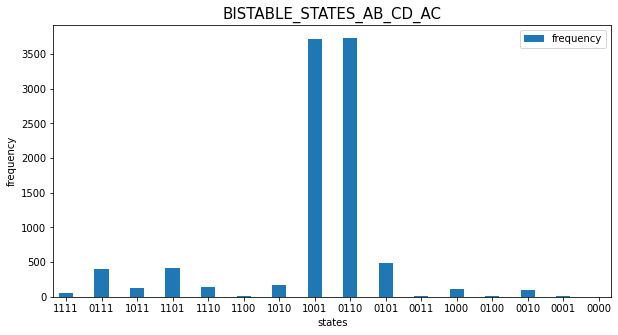

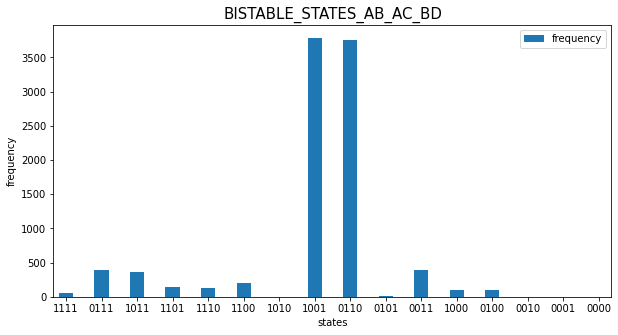

In [ ]:
for i in range (int(len(df)/16)):
  edges = ['']*6
  for j in range(6):
    if df.iloc[:,14+j][i*16] == 1: edges[j] = '_'+df.columns[14+j]
  plt.figure(figsize = (10,5))
  plt.ylabel('frequency')
  plt.xlabel('states')
  plt.title('BISTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], fontdict = {'size':15})
  x_axis = np.arange(16)
  plt.bar(x_axis + 0.2,df['freq2'][i*16+0:i*16+16], 0.4, label = 'frequency')
  # plt.bar(x_axis - 0.2,df['pedge'][i*62+0:i*62+62], 0.4, label = 'pedges')
  plt.xticks(x_axis + 0.2, df3['string'])
  plt.margins(0.01,0.05)
  plt.legend()
  plt.savefig('11_TPsq_bistable/BISTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], bbox_inches = 'tight')
  plt.show()


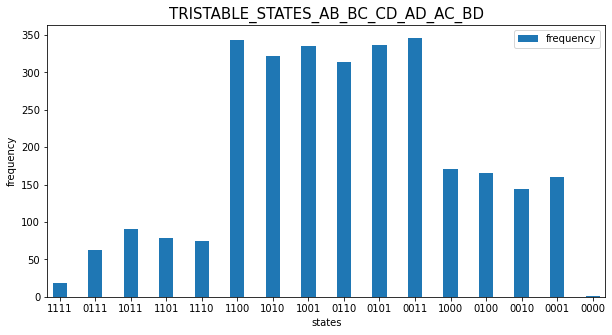

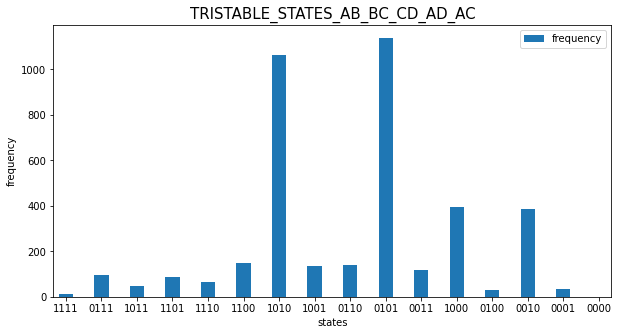

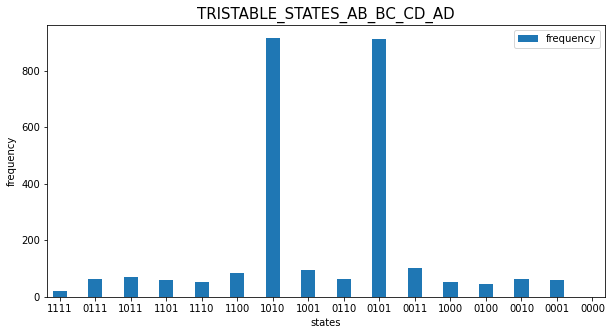

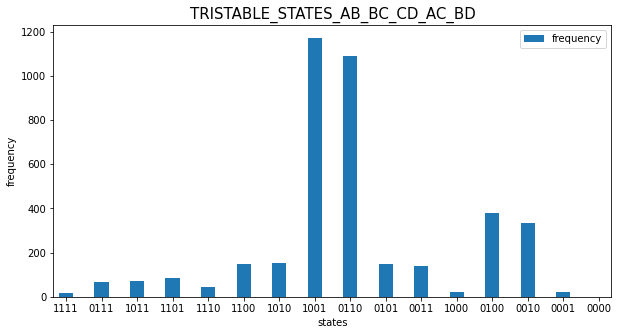

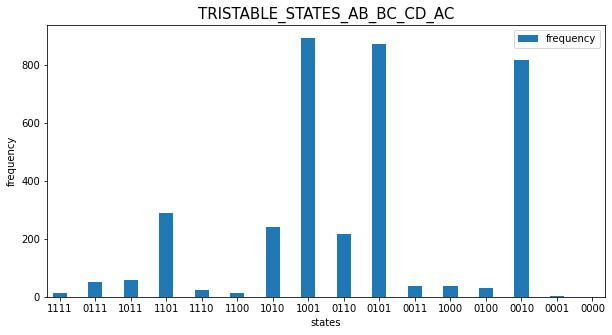

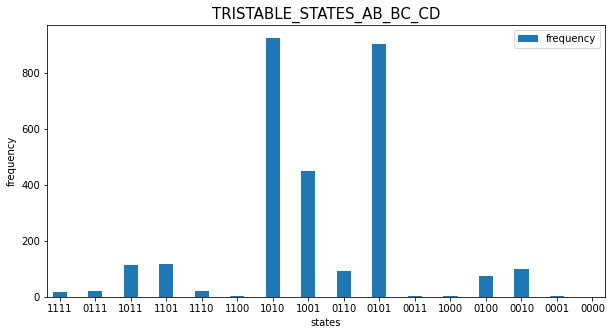

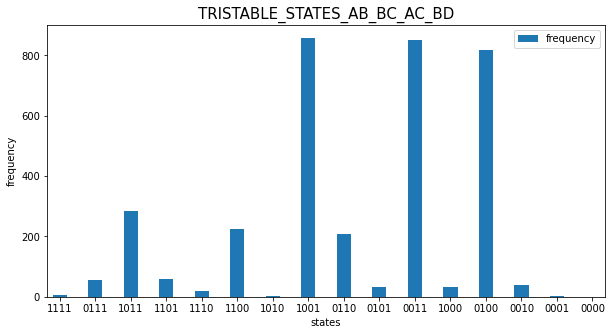

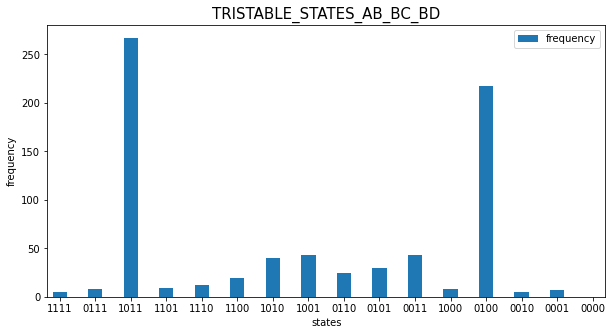

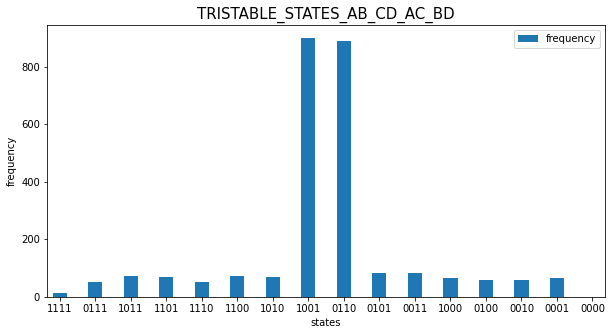

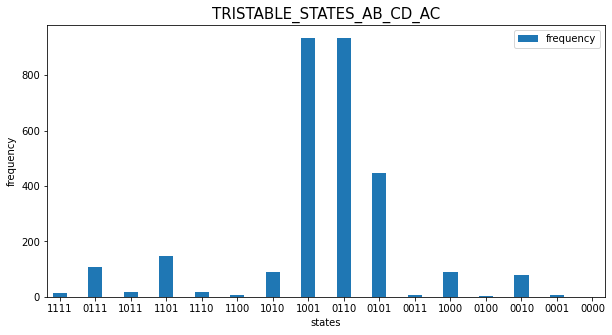

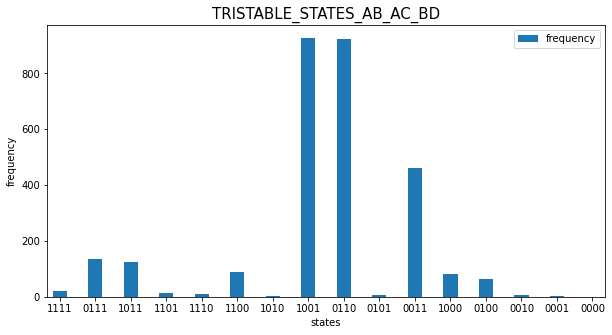

In [ ]:
for i in range (int(len(df)/16)):
  edges = ['']*6
  for j in range(6):
    if df.iloc[:,14+j][i*16] == 1: edges[j] = '_'+df.columns[14+j]
  plt.figure(figsize = (10,5))
  plt.ylabel('frequency')
  plt.xlabel('states')
  plt.title('TRISTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], fontdict = {'size':15})
  x_axis = np.arange(16)
  plt.bar(x_axis + 0.2,df['freq3'][i*16+0:i*16+16], 0.4, label = 'frequency')
  # plt.bar(x_axis - 0.2,df['pedge'][i*62+0:i*62+62], 0.4, label = 'pedges')
  plt.xticks(x_axis + 0.2, df3['string'])
  plt.margins(0.01,0.05)
  plt.legend()
  plt.savefig('11_TPsq_tristable/TRISTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], bbox_inches = 'tight')
  plt.show()


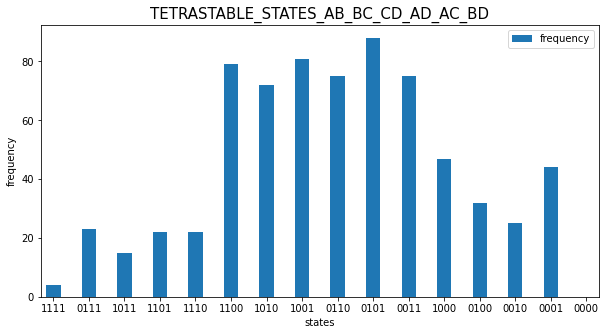

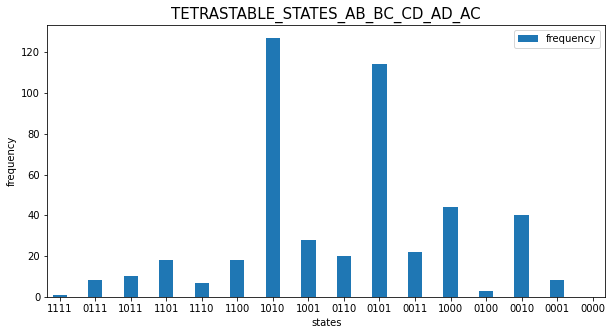

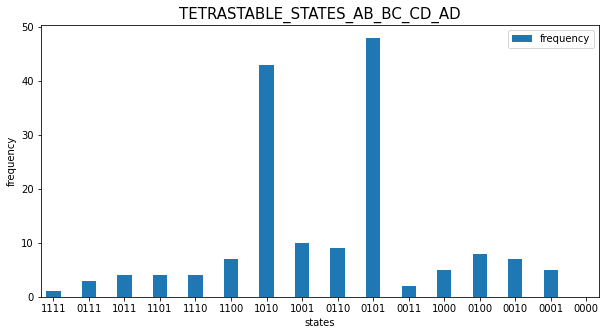

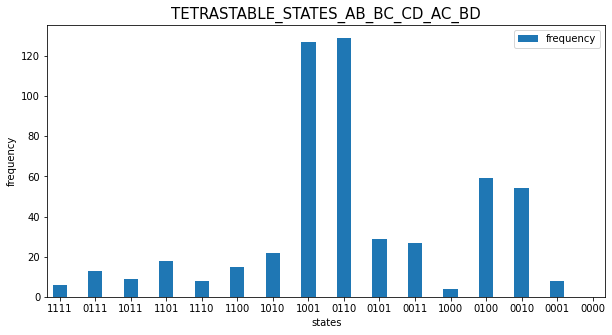

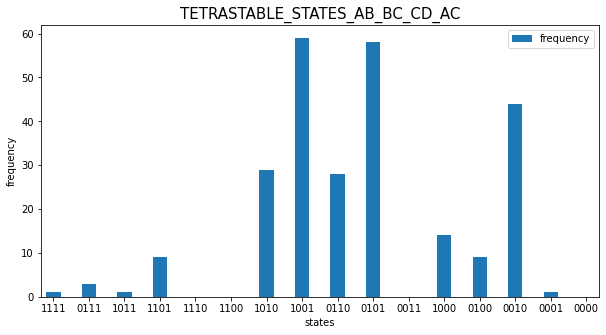

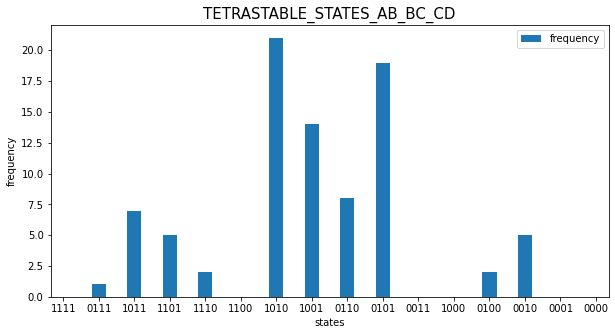

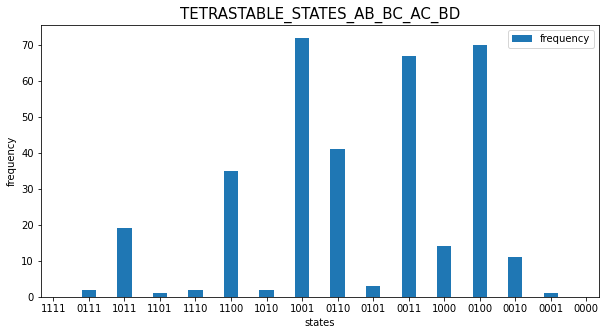

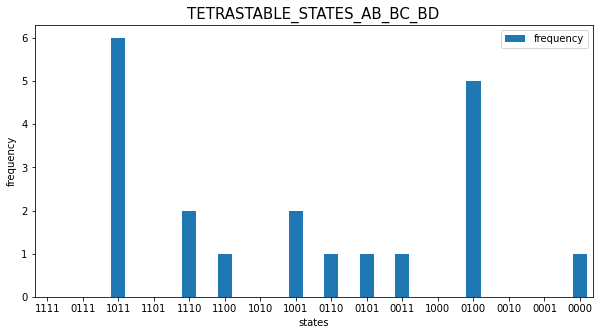

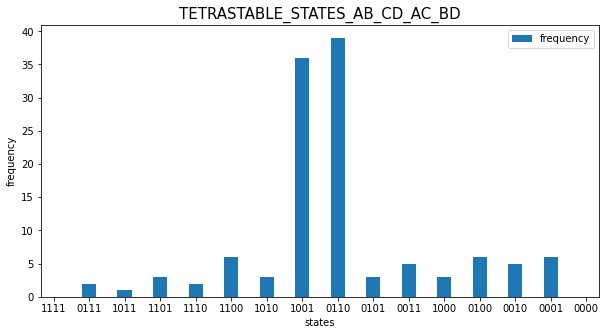

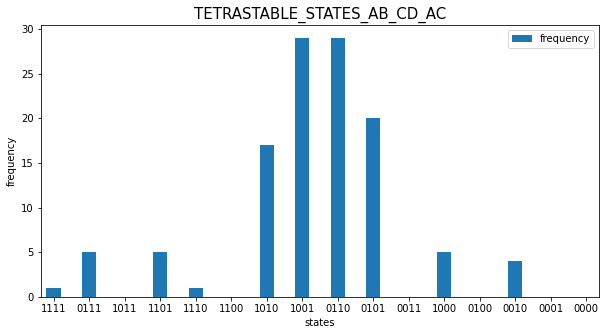

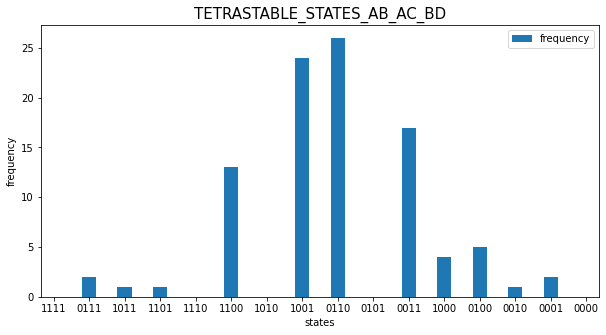

In [ ]:
for i in range (int(len(df)/16)):
  edges = ['']*6
  for j in range(6):
    if df.iloc[:,14+j][i*16] == 1: edges[j] = '_'+df.columns[14+j]
  plt.figure(figsize = (10,5))
  plt.ylabel('frequency')
  plt.xlabel('states')
  plt.title('TETRASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], fontdict = {'size':15})
  x_axis = np.arange(16)
  plt.bar(x_axis + 0.2,df['freq4'][i*16+0:i*16+16], 0.4, label = 'frequency')
  # plt.bar(x_axis - 0.2,df['pedge'][i*62+0:i*62+62], 0.4, label = 'pedges')
  plt.xticks(x_axis + 0.2, df3['string'])
  plt.margins(0.01,0.05)
  plt.legend()
  plt.savefig('11_TPsq_tetrastable/TETRASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], bbox_inches = 'tight')
  plt.show()


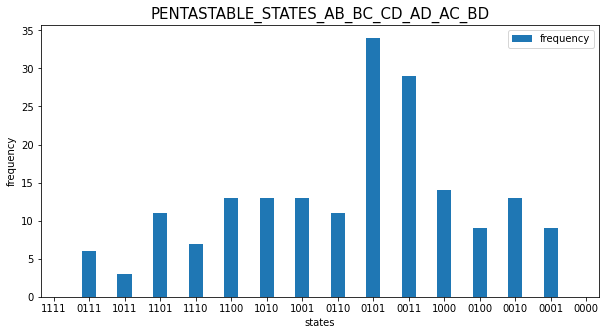

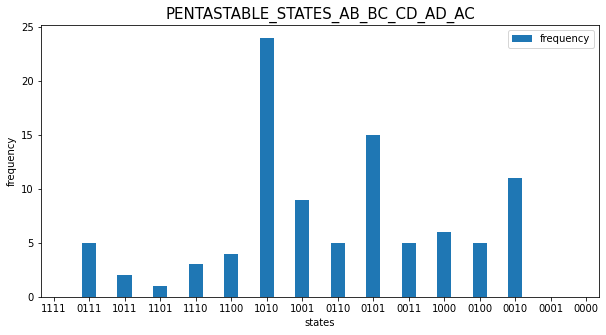

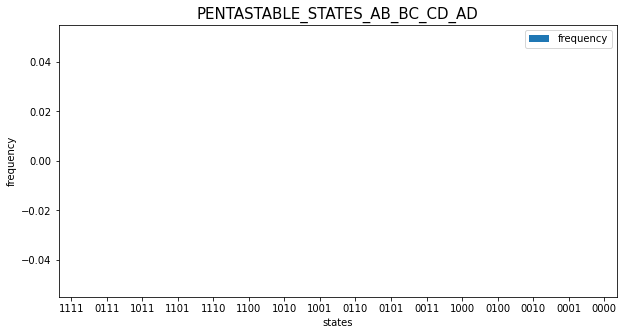

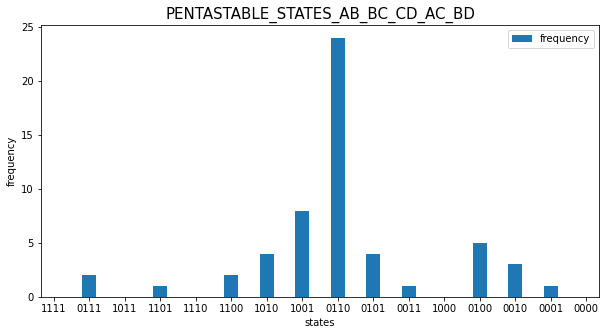

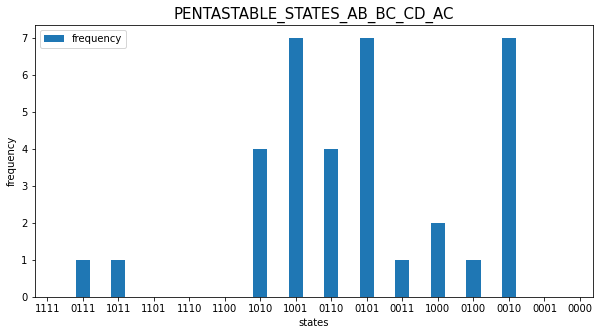

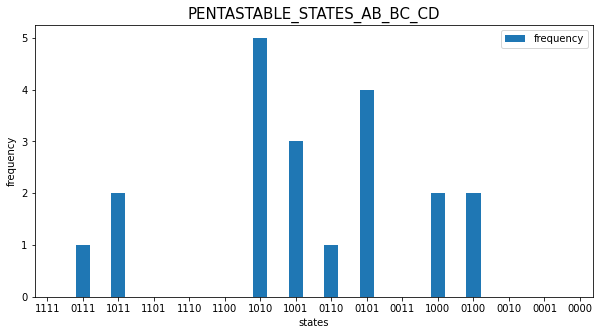

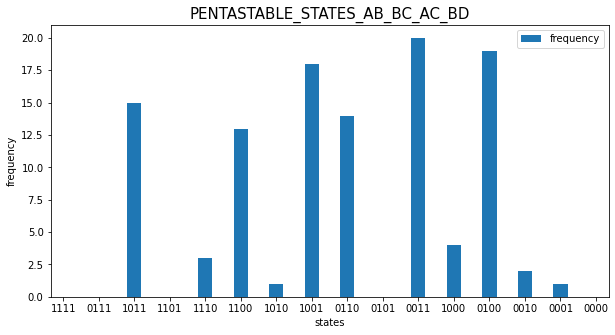

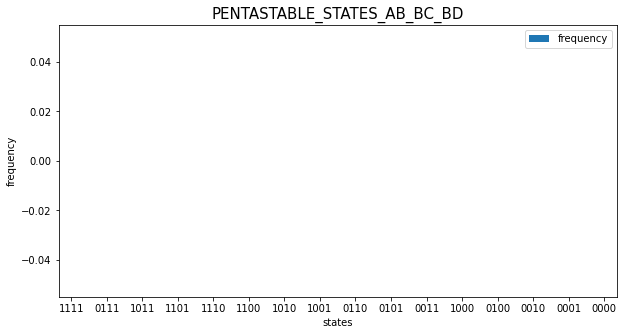

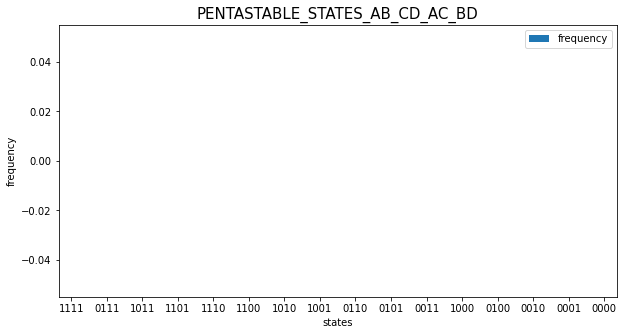

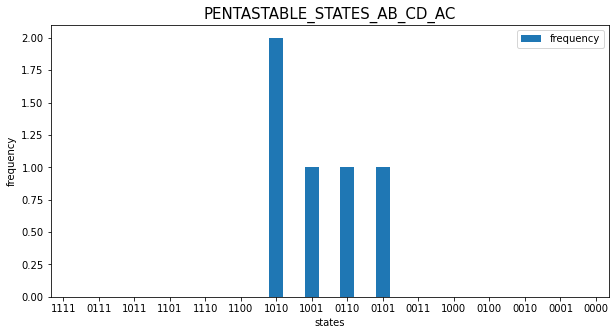

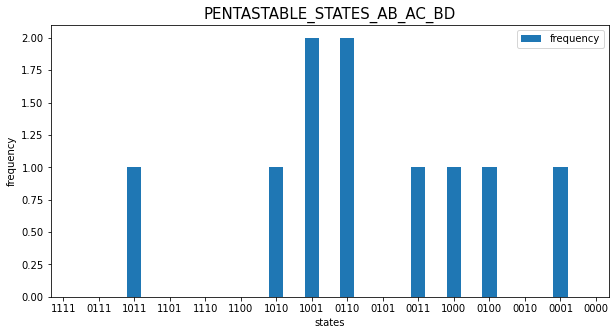

In [ ]:
for i in range (int(len(df)/16)):
  edges = ['']*6
  for j in range(6):
    if df.iloc[:,14+j][i*16] == 1: edges[j] = '_'+df.columns[14+j]
  plt.figure(figsize = (10,5))
  plt.ylabel('frequency')
  plt.xlabel('states')
  plt.title('PENTASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], fontdict = {'size':15})
  x_axis = np.arange(16)
  plt.bar(x_axis + 0.2,df['freq5'][i*16+0:i*16+16], 0.4, label = 'frequency')
  # plt.bar(x_axis - 0.2,df['pedge'][i*62+0:i*62+62], 0.4, label = 'pedges')
  plt.xticks(x_axis + 0.2, df3['string'])
  plt.margins(0.01,0.05)
  plt.legend()
  plt.savefig('11_TPsq_pentastable/PENTASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], bbox_inches = 'tight')
  plt.show()

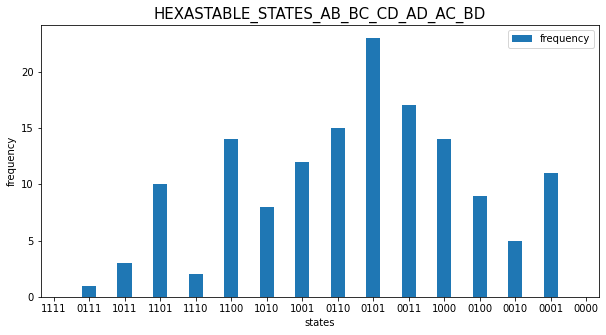

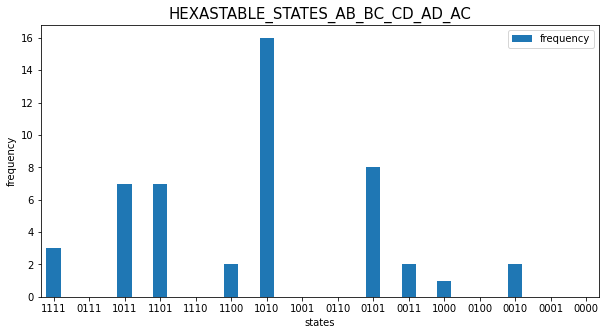

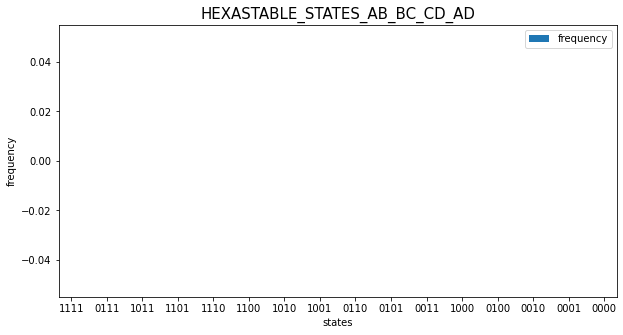

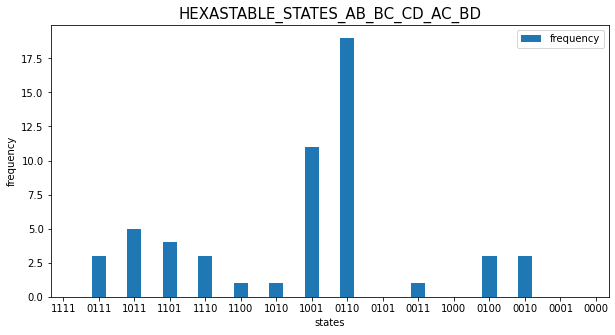

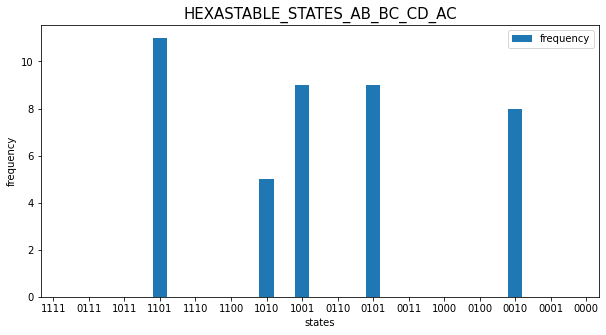

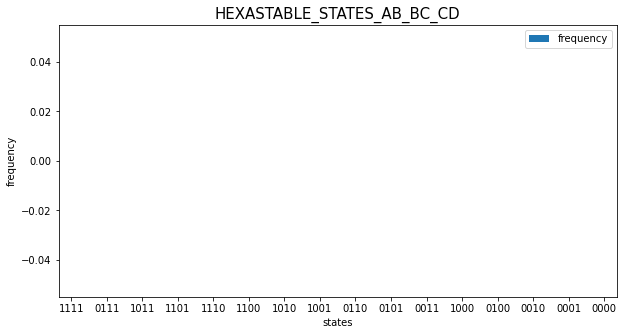

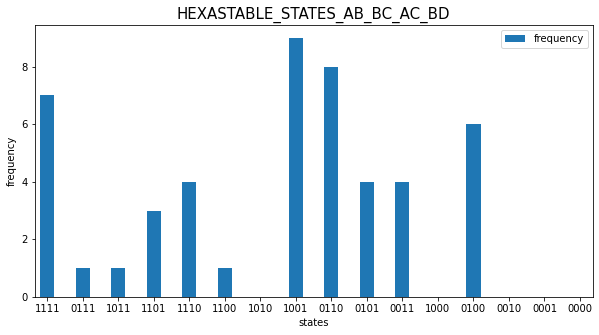

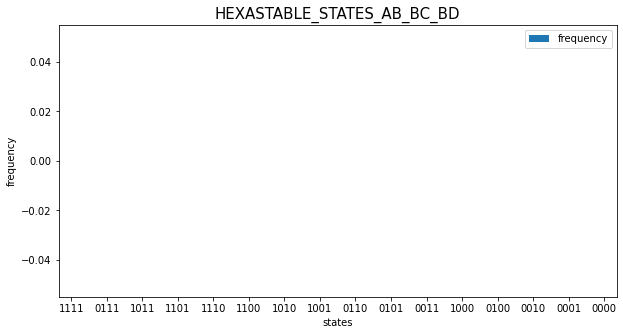

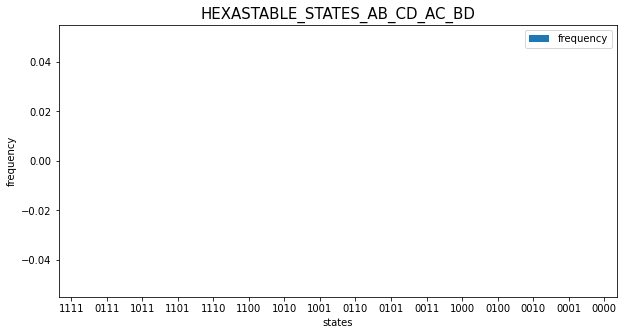

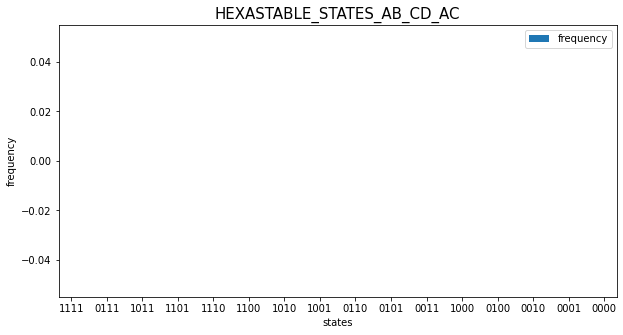

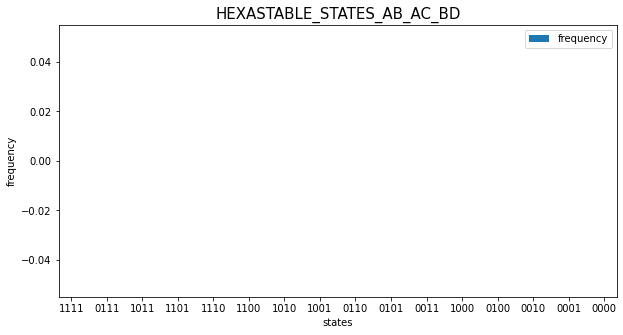

In [ ]:
for i in range (int(len(df)/16)):
  edges = ['']*6
  for j in range(6):
    if df.iloc[:,14+j][i*16] == 1: edges[j] = '_'+df.columns[14+j]
  plt.figure(figsize = (10,5))
  plt.ylabel('frequency')
  plt.xlabel('states')
  plt.title('HEXASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], fontdict = {'size':15})
  x_axis = np.arange(16)
  plt.bar(x_axis + 0.2,df['freq6'][i*16+0:i*16+16], 0.4, label = 'frequency')
  # plt.bar(x_axis - 0.2,df['pedge'][i*62+0:i*62+62], 0.4, label = 'pedges')
  plt.xticks(x_axis + 0.2, df3['string'])
  plt.margins(0.01,0.05)
  plt.legend()
  plt.savefig('11_TPsq_hexastable/HEXASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], bbox_inches = 'tight')
  plt.show()


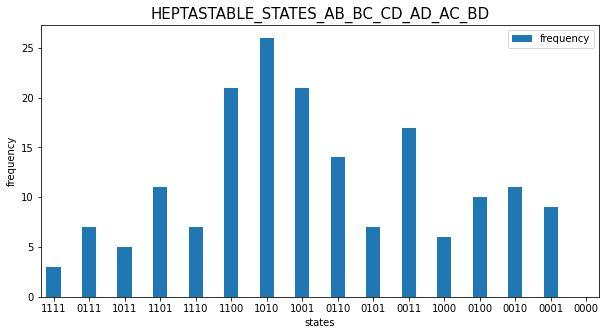

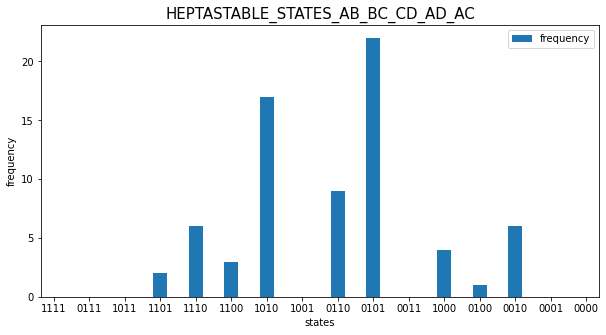

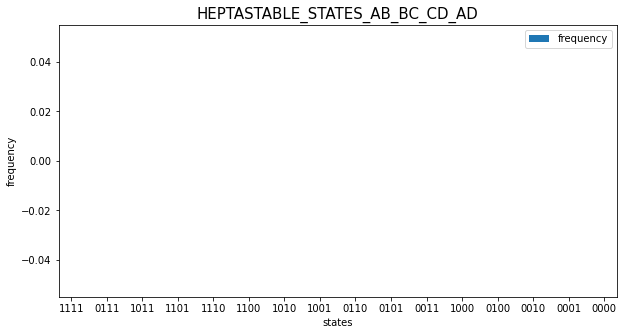

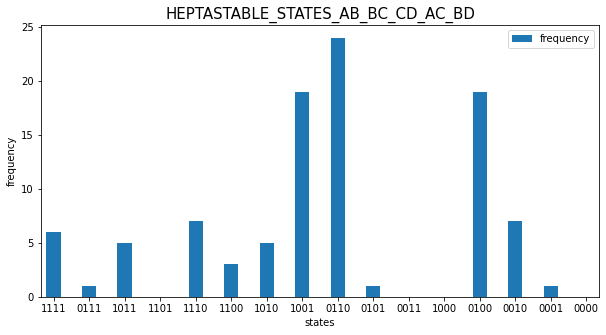

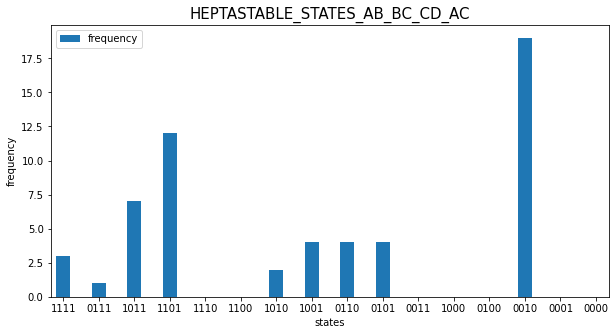

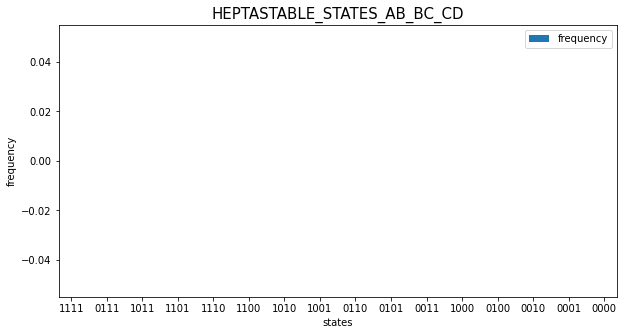

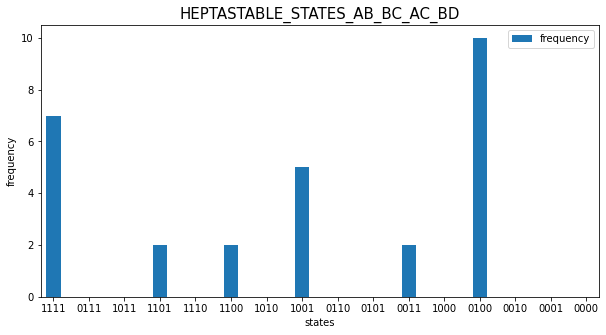

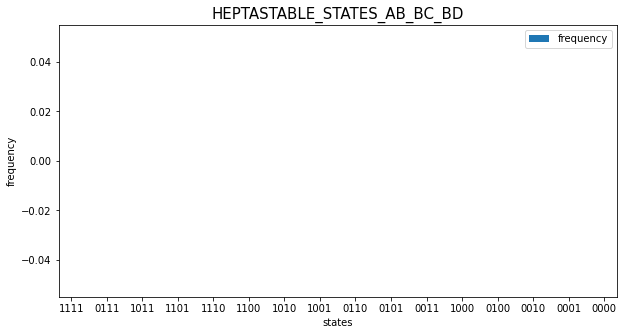

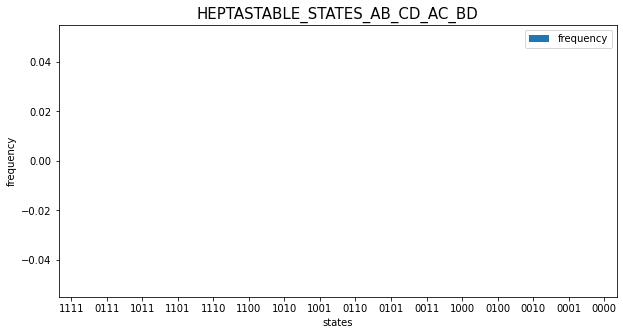

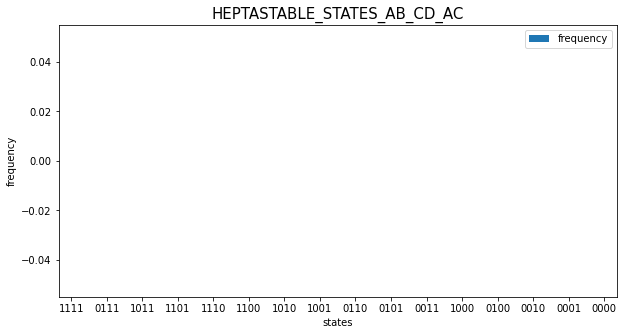

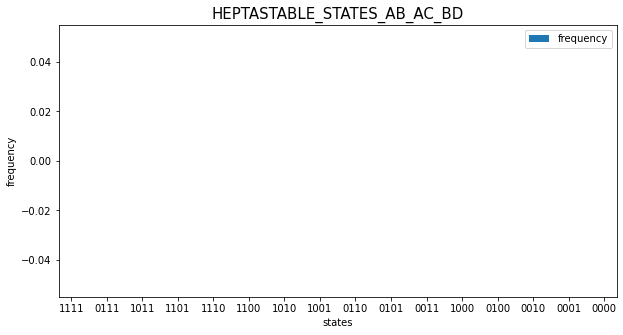

In [ ]:
for i in range (int(len(df)/16)):
  edges = ['']*6
  for j in range(6):
    if df.iloc[:,14+j][i*16] == 1: edges[j] = '_'+df.columns[14+j]
  plt.figure(figsize = (10,5))
  plt.ylabel('frequency')
  plt.xlabel('states')
  plt.title('HEPTASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], fontdict = {'size':15})
  x_axis = np.arange(16)
  plt.bar(x_axis + 0.2,df['freq7'][i*16+0:i*16+16], 0.4, label = 'frequency')
  # plt.bar(x_axis - 0.2,df['pedge'][i*62+0:i*62+62], 0.4, label = 'pedges')
  plt.xticks(x_axis + 0.2, df3['string'])
  plt.margins(0.01,0.05)
  plt.legend()
  plt.savefig('11_TPsq_heptastable/HEPTASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], bbox_inches = 'tight')
  plt.show()


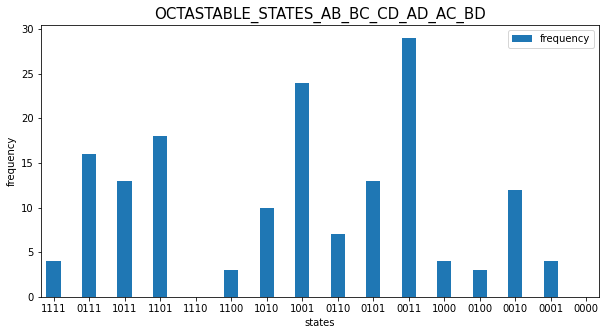

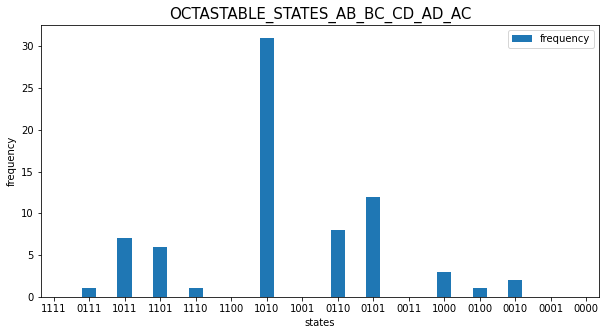

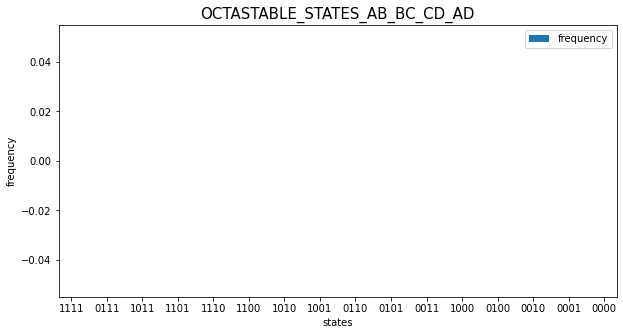

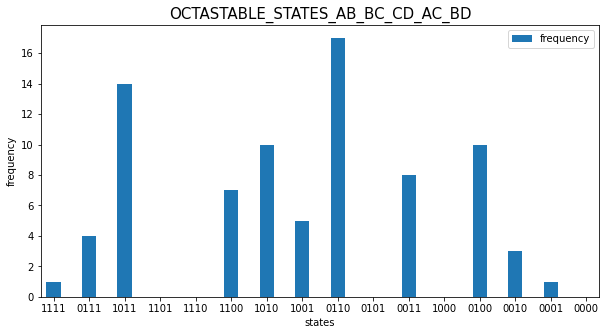

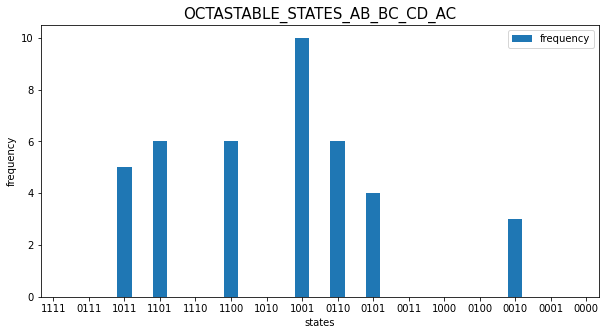

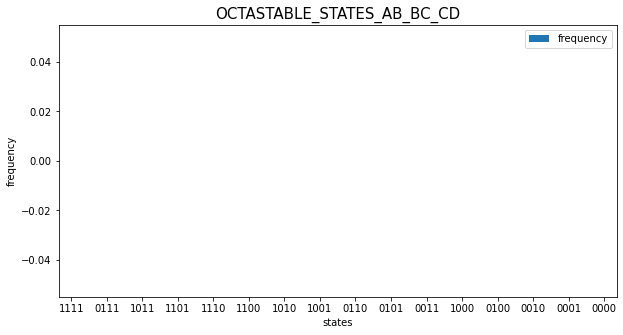

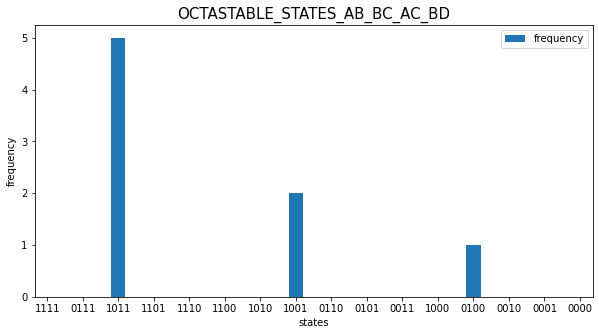

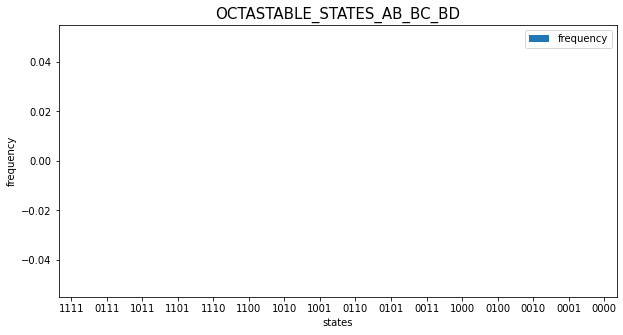

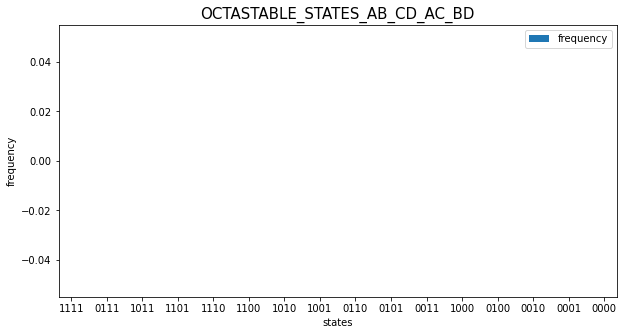

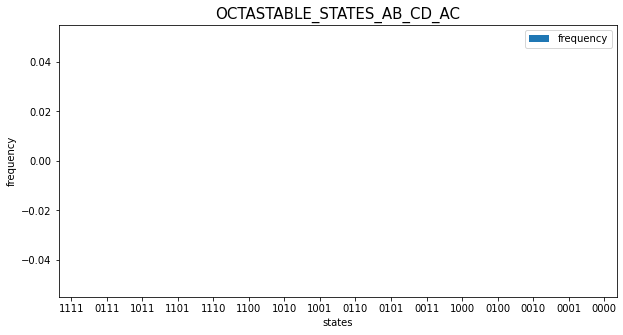

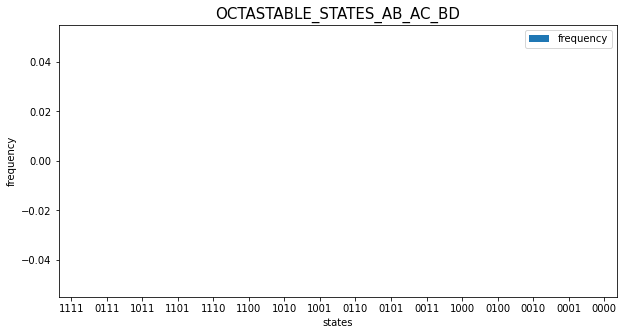

In [ ]:
for i in range (int(len(df)/16)):
  edges = ['']*6
  for j in range(6):
    if df.iloc[:,14+j][i*16] == 1: edges[j] = '_'+df.columns[14+j]
  plt.figure(figsize = (10,5))
  plt.ylabel('frequency')
  plt.xlabel('states')
  plt.title('OCTASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], fontdict = {'size':15})
  x_axis = np.arange(16)
  plt.bar(x_axis + 0.2,df['freq8'][i*16+0:i*16+16], 0.4, label = 'frequency')
  # plt.bar(x_axis - 0.2,df['pedge'][i*62+0:i*62+62], 0.4, label = 'pedges')
  plt.xticks(x_axis + 0.2, df3['string'])
  plt.margins(0.01,0.05)
  plt.legend()
  plt.savefig('11_TPsq_octastable/OCTASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], bbox_inches = 'tight')
  plt.show()


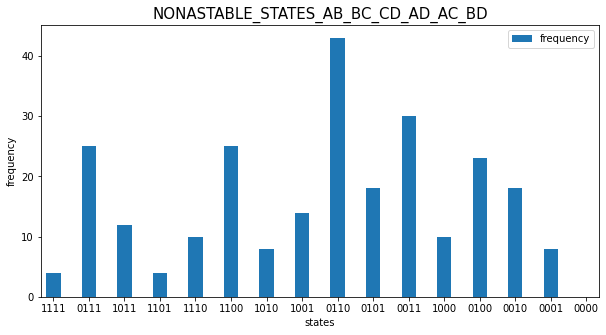

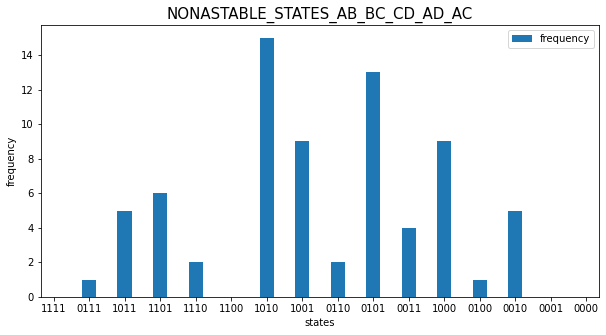

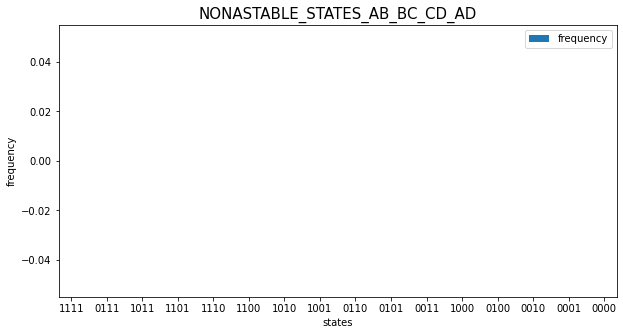

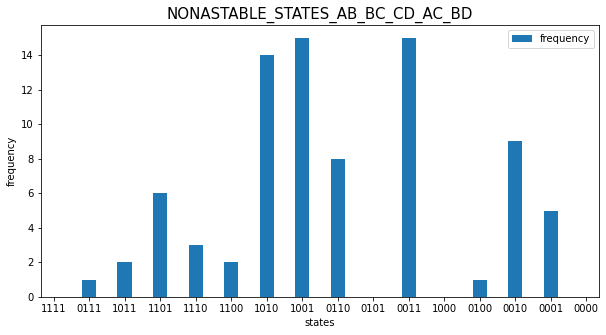

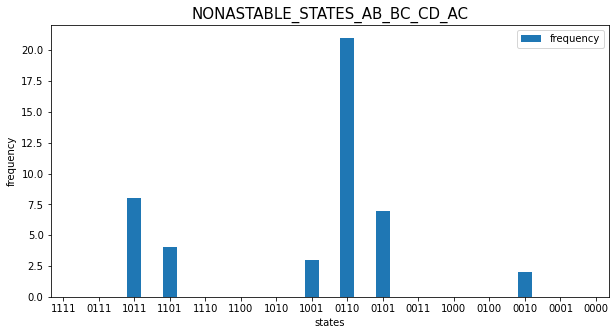

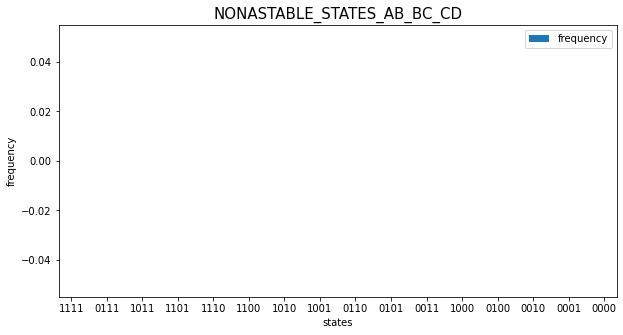

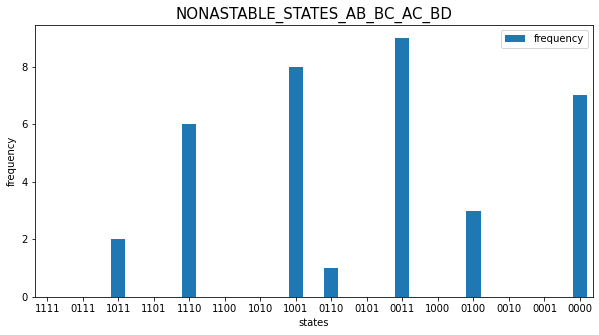

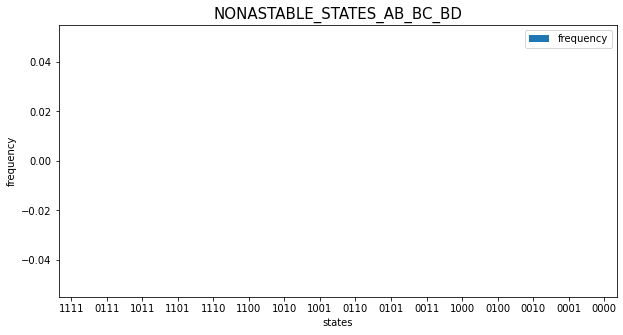

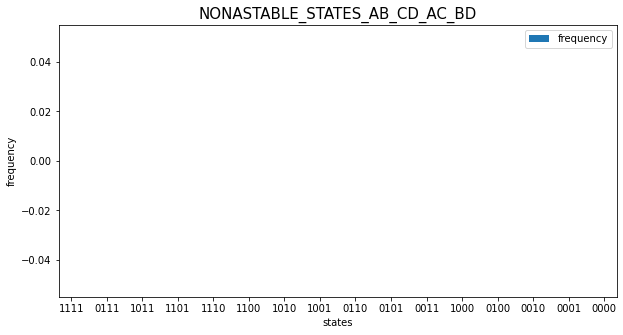

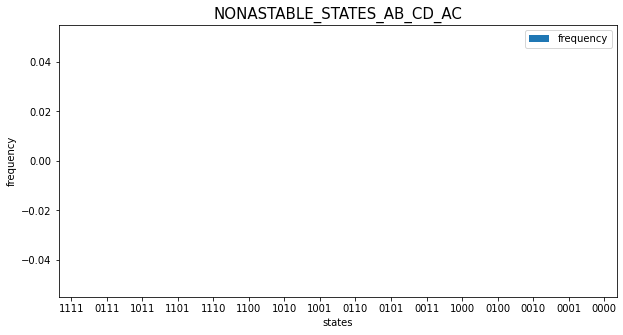

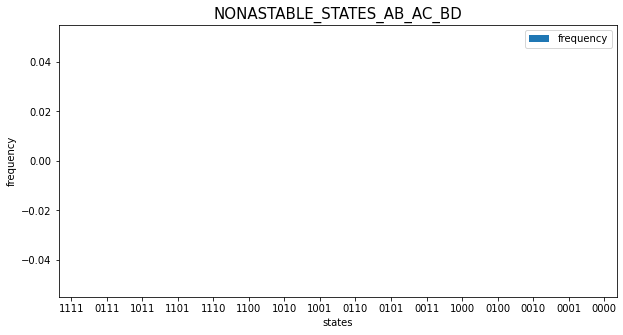

In [ ]:
for i in range (int(len(df)/16)):
  edges = ['']*6
  for j in range(6):
    if df.iloc[:,14+j][i*16] == 1: edges[j] = '_'+df.columns[14+j]
  plt.figure(figsize = (10,5))
  plt.ylabel('frequency')
  plt.xlabel('states')
  plt.title('NONASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], fontdict = {'size':15})
  x_axis = np.arange(16)
  plt.bar(x_axis + 0.2,df['freq9'][i*16+0:i*16+16], 0.4, label = 'frequency')
  # plt.bar(x_axis - 0.2,df['pedge'][i*62+0:i*62+62], 0.4, label = 'pedges')
  plt.xticks(x_axis + 0.2, df3['string'])
  plt.margins(0.01,0.05)
  plt.legend()
  plt.savefig('11_TPsq_nonastable/NONASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], bbox_inches = 'tight')
  plt.show()


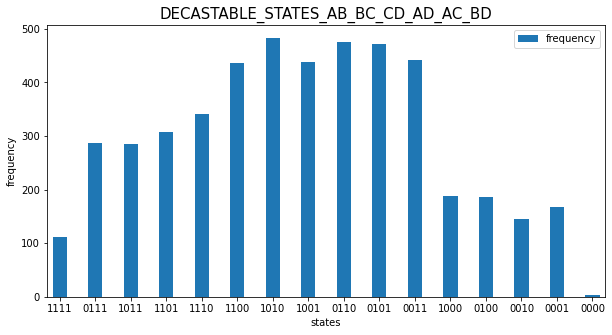

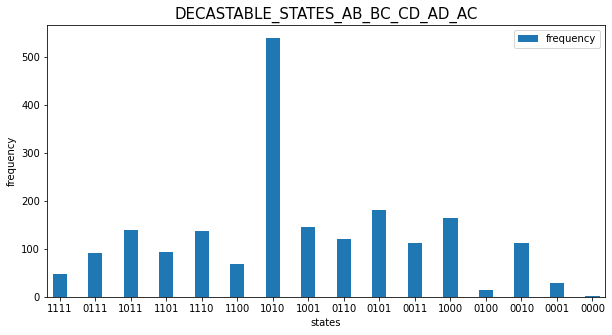

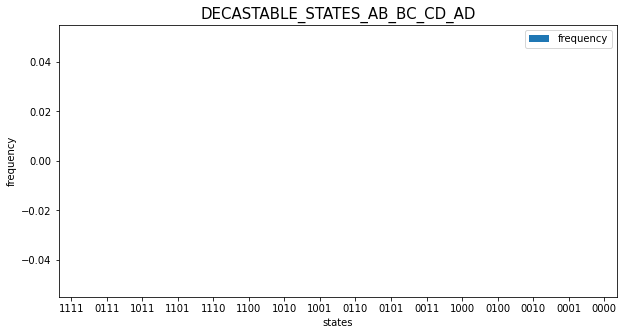

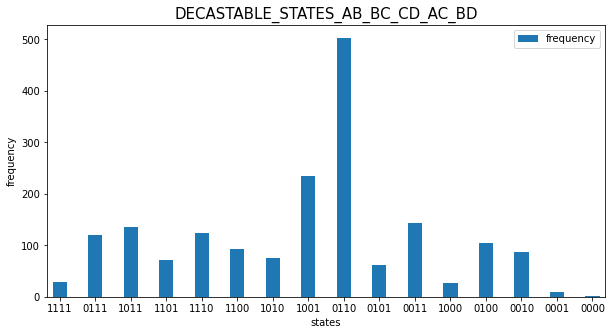

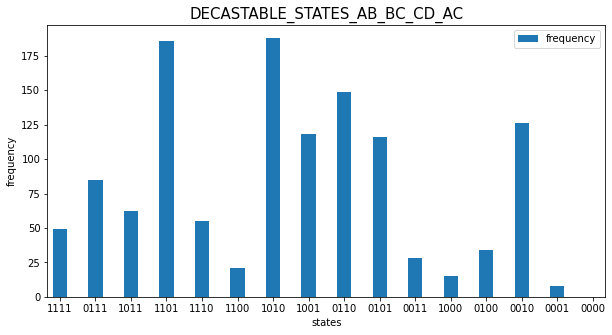

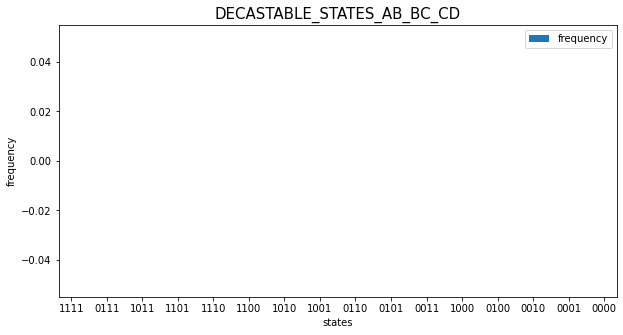

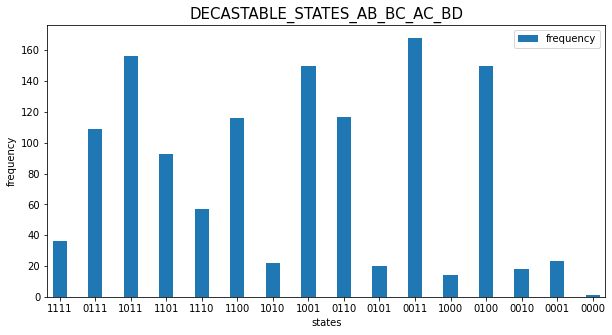

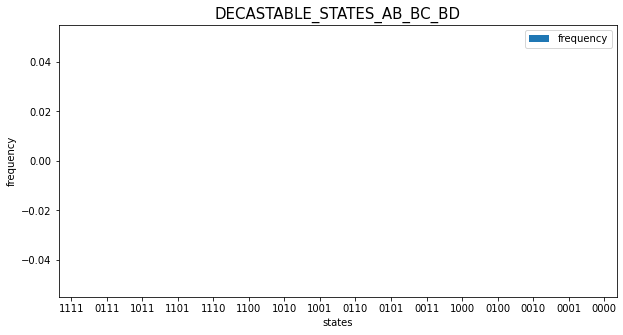

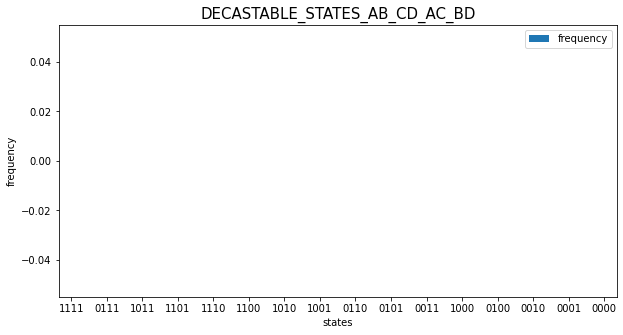

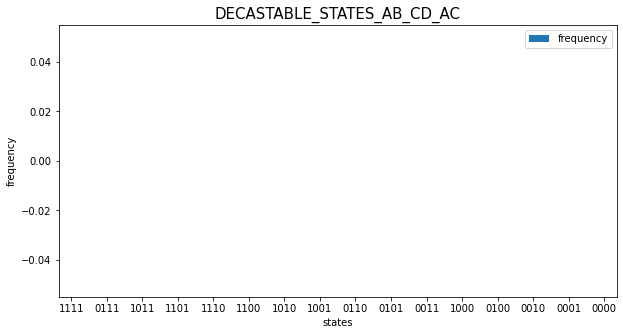

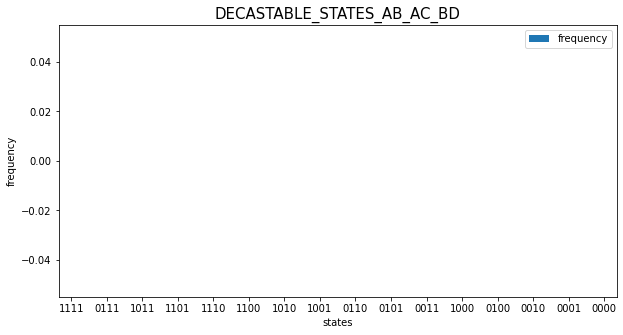

In [ ]:
for i in range (int(len(df)/16)):
  edges = ['']*6
  for j in range(6):
    if df.iloc[:,14+j][i*16] == 1: edges[j] = '_'+df.columns[14+j]
  plt.figure(figsize = (10,5))
  plt.ylabel('frequency')
  plt.xlabel('states')
  plt.title('DECASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], fontdict = {'size':15})
  x_axis = np.arange(16)
  plt.bar(x_axis + 0.2,df['freq10'][i*16+0:i*16+16], 0.4, label = 'frequency')
  # plt.bar(x_axis - 0.2,df['pedge'][i*62+0:i*62+62], 0.4, label = 'pedges')
  plt.xticks(x_axis + 0.2, df3['string'])
  plt.margins(0.01,0.05)
  plt.legend()
  plt.savefig('11_TPsq_decastable/DECASTABLE_STATES'+edges[0]+edges[1]+edges[2]+edges[3]+edges[4]+edges[5], bbox_inches = 'tight')
  plt.show()


In [ ]:
!zip -r 11_TPsq.zip 11_TPsq/

  adding: 11_TPsq/ (stored 0%)
  adding: 11_TPsq/11_TPsq_heptastable/ (stored 0%)
  adding: 11_TPsq/11_TPsq_heptastable/HEPTASTABLE_STATES_AB_BC_CD_AD_AC.png (deflated 16%)
  adding: 11_TPsq/11_TPsq_heptastable/HEPTASTABLE_STATES_AB_BC_BD.png (deflated 17%)
  adding: 11_TPsq/11_TPsq_heptastable/HEPTASTABLE_STATES_AB_CD_AC_BD.png (deflated 16%)
  adding: 11_TPsq/11_TPsq_heptastable/HEPTASTABLE_STATES_AB_BC_AC_BD.png (deflated 16%)
  adding: 11_TPsq/11_TPsq_heptastable/HEPTASTABLE_STATES_AB_CD_AC.png (deflated 16%)
  adding: 11_TPsq/11_TPsq_heptastable/HEPTASTABLE_STATES_AB_BC_CD_AC.png (deflated 14%)
  adding: 11_TPsq/11_TPsq_heptastable/HEPTASTABLE_STATES_AB_AC_BD.png (deflated 17%)
  adding: 11_TPsq/11_TPsq_heptastable/HEPTASTABLE_STATES_AB_BC_CD_AC_BD.png (deflated 16%)
  adding: 11_TPsq/11_TPsq_heptastable/HEPTASTABLE_STATES_AB_BC_CD_AD.png (deflated 17%)
  adding: 11_TPsq/11_TPsq_heptastable/HEPTASTABLE_STATES_AB_BC_CD_AD_AC_BD.png (deflated 15%)
  adding: 11_TPsq/11_TPsq_heptastab